<ipython-input-2-da0b29a2d93f>:46: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


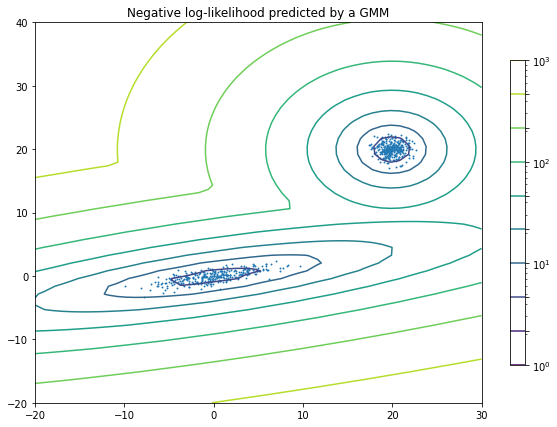

In [2]:
"""
=========================================
Density Estimation for a Gaussian mixture
=========================================
Plot the density estimation of a mixture of two Gaussians. Data is
generated from two Gaussians with different centers and covariance
matrices.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0.0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
clf.fit(X_train)

# display predicted scores by the model as a contour plot
plt.figure(figsize = (10,7))
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

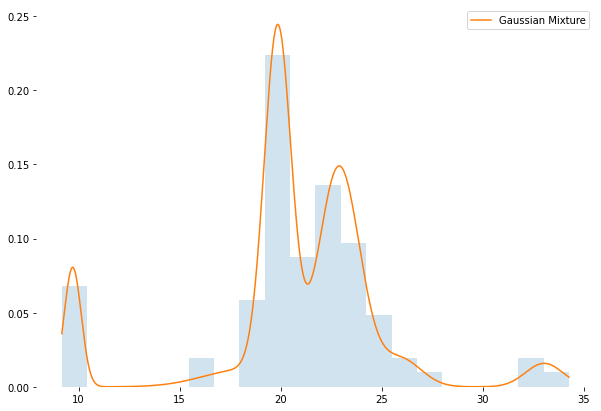

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

galaxies = np.array([
    9172, 9350, 9483, 9558, 9775, 10227, 10406, 16084, 16170, 18419, 
    18552, 18600, 18927, 19052, 19070, 19330, 19343, 19349, 19440, 
    19473, 19529, 19541, 19547, 19663, 19846, 19856, 19863, 19914, 
    19918, 19973, 19989, 20166, 20175, 20179, 20196, 20215, 20221, 
    20415, 20629, 20795, 20821, 20846, 20875, 20986, 21137, 21492, 
    21701, 21814, 21921, 21960, 22185, 22209, 22242, 22249, 22314, 
    22374, 22495, 22746, 22747, 22888, 22914, 23206, 23241, 23263, 
    23484, 23538, 23542, 23666, 23706, 23711, 24129, 24285, 24289, 
    24366, 24717, 24990, 25633, 26690, 26995, 32065, 32789, 34279
])/1000

galaxies = galaxies.reshape((galaxies.shape[0], 1))
K = 6

def mix_pdf(x, loc, scale, weights):
    d = np.zeros_like(x)
    for mu, sigma, pi in zip(loc, scale, weights):
        d += pi * norm.pdf(x, loc=mu, scale=sigma)
    return d

mix = GaussianMixture(n_components=K, random_state=1, max_iter=100).fit(galaxies)
pi, mu, sigma = mix.weights_.flatten(), mix.means_.flatten(), np.sqrt(mix.covariances_.flatten())

grid = np.arange(np.min(galaxies), np.max(galaxies), 0.01)

plt.figure(figsize = (10,7))
plt.hist(galaxies, bins=20, density=True, alpha=0.2)
plt.plot(grid, mix_pdf(grid, mu, sigma, pi), label='Gaussian Mixture')
plt.legend(loc='upper right')
plt.box(False)
plt.show()